<a href="https://colab.research.google.com/github/pmccthy/data-science-playground/blob/main/decompositions/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis**

Principal Component Analysis (PCA) is essentially just SVD on the covariance matrix of whichever features you have. It finds the linear combinations of features which maximise explained variance (whilst forming an orthogonal basis set). These are given by the eigenpairs of the covariance matrix. Here, we will perform PCA on Fisher's iris dataset.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np


In [ ]:
# load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

Fisher's iris dataset consists of measurements for 150 flowers across 4 features (sepal length, sepal width, petal length, petal width), where each flower belongs to one of 3 species (Iris setosa, Iris virginica and Iris versicolor). This is evident in the dimensions of the input and target data (dependent and independent variables, respectively).

In [ ]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')


X: (150, 4)
y: (150,)


PCA consists of the following steps:


1.   Find the covariance matrix for your features
2.   Perform SVD (or equivalently, eigendecomposition)



In [ ]:
# perform the PCA and project data onto two first PCs
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0.5, 1.0, 'PCA on iris dataset')

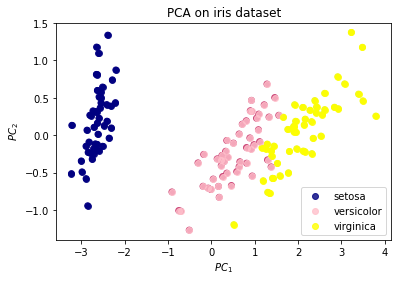

In [ ]:
# visualise results
plt.scatter(X_r[:,0], X_r[:,1], c=y, cmap='plasma')
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$')
colours = ['navy', 'pink', 'yellow']
for colour, i, target_name in zip(colours, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=colour, alpha=0.8, label=target_name)
plt.xlabel('$PC_1$')
plt.ylabel('$PC_2$')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA on iris dataset")


In [ ]:
# let's look at the amount of variance explained by each PC (the eigenvalue corresponding to each PC as a proportion of the sum of eigenvalues)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

This fits with our observation of the scatter plot above. Intuitively,  the classes are much more easily separable along the first PC than along the second.